In [2]:
import pandas as pd
import matplotlib.pyplot as mpl
import numpy as np

event = pd.read_json(r'/home/tiago/Scrivania/Libri Magistrale/1st semester/ADM/HomeWork2/Event/events_England.json')[ ['playerId', 'tags','matchId', 'teamId', 'matchPeriod', 'eventSec']]
event.head(100)

,playerId,tags,matchId,teamId,matchPeriod,eventSec
0,25413,[{'id': 1801}],2499719,1609,1H,2.758649
1,370224,[{'id': 1801}],2499719,1609,1H,4.946850
2,3319,[{'id': 1801}],2499719,1609,1H,6.542188
3,120339,[{'id': 1801}],2499719,1609,1H,8.143395
4,167145,[{'id': 1801}],2499719,1609,1H,10.302366
...,...,...,...,...,...,...
95,8480,[],2499719,1631,1H,324.623007
96,8480,[{'id': 1801}],2499719,1631,1H,340.684982
97,14853,[{'id': 1801}],2499719,1631,1H,342.852928
98,370224,"[{'id': 703}, {'id': 1801}]",2499719,1609,1H,344.968625


In [3]:
myRow=[] #looking for goals
for index, row in event.iterrows():
    tags=row['tags']
    for e in tags:
        if e == {'id':101}:
            myRow.append(row)
event=pd.DataFrame(myRow) #create a dataframe with only goals
event.drop('tags', axis=1, inplace=True) #remove tags

#event=event['id' in event['tags'].keys() and 101 in event['tags'].values()]
event.head()

,playerId,matchId,teamId,matchPeriod,eventSec
46,25413,2499719,1609,1H,94.595788
47,8480,2499719,1631,1H,96.970614
91,14763,2499719,1631,1H,254.745027
92,7882,2499719,1609,1H,256.547834
554,12829,2499719,1631,1H,1710.855093


In [4]:
secOf9min=60*9

event['eventSecDiscrete']=event['eventSec']/secOf9min #create the seconds decrete
event['eventSecDiscrete']=event['eventSecDiscrete'].astype(int) #arount to int
event.drop('eventSec', axis=1, inplace=True) 
event.head()

,playerId,matchId,teamId,matchPeriod,eventSecDiscrete
46,25413,2499719,1609,1H,0
47,8480,2499719,1631,1H,0
91,14763,2499719,1631,1H,0
92,7882,2499719,1609,1H,0
554,12829,2499719,1631,1H,3


# i. Make a barplot with the absolute frequency of goals in all the time slots.

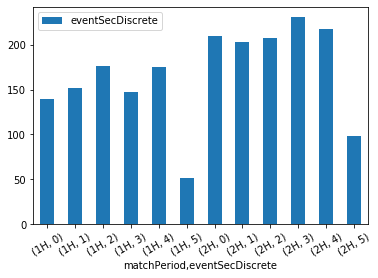

In [6]:
eventGroupSecDiscrete=event.groupby(['matchPeriod', 'eventSecDiscrete']).agg({'eventSecDiscrete':'count'}) #groping on periods and second descrete counting the second discrete
ax=eventGroupSecDiscrete.plot.bar(rot=30)

# ii. Find the top 10 teams that score the most in the interval "81-90"

In [7]:
#filter event by the minutes 81-90 -> (2H, 4) 
event2H4=event.loc[(event['matchPeriod']=='2H') & (event['eventSecDiscrete']==4)]#selection

eventGroupTeams=event2H4.groupby('teamId').agg({'eventSecDiscrete':'count'}) #grouping on teamId and aggregating counting on seconds dicrete


print(eventGroupTeams, end='\n\n')
gt=eventGroupTeams.to_dict()['eventSecDiscrete'] #trasform the dataframe into a ictionary and optain the inside dictionary
print('First 10 team by number of goals')
for w in sorted(gt, key=gt.get, reverse=True)[:10]:#print the first ten sorted elements
  print(w, gt[w])

        eventSecDiscrete
teamId                  
1609                  16
1610                  13
1611                  10
1612                  11
1613                   7
1619                   8
1623                  12
1624                   9
1625                  15
1627                   8
1628                  13
1631                   9
1633                  15
1639                  11
1644                  16
1646                   7
1651                  10
1659                  11
1673                   4
10531                 12

First 10 team by number of goals
1609 16
1644 16
1625 15
1633 15
1610 13
1628 13
1623 12
10531 12
1612 11
1639 11


# iii. Show if there are players that were able to score at least one goal in 8 different intervals

In [24]:
eventWitoutDuplicateOnId_eventSecDiscrete=event.drop_duplicates(['playerId', 'matchPeriod', 'eventSecDiscrete'])
#print(eventWitoutDuplicateOnId_eventSecDiscrete)
eventPlayerGoal=eventWitoutDuplicateOnId_eventSecDiscrete.groupby('playerId').agg({'eventSecDiscrete':'count'})
#eventPlayer8=eventPlayerGoal.loc[eventPlayerGoal[]]
#print(eventPlayerGoal)
eventPlayerGoalDict=eventPlayerGoal['eventSecDiscrete'].to_dict()

#print('Player with at least one goal in 8 different intervals')
for w in eventPlayerGoalDict.keys():#print the first ten sorted elements
    if eventPlayerGoalDict[w]>=8:
        print(w, eventPlayerGoalDict[w])

3324 9
3429 11
3582 11
7847 11
7882 11
7905 9
7910 11
7974 10
8094 11
8266 11
8301 12
8358 12
8391 10
8422 8
8425 11
8480 12
8514 11
8580 10
8717 11
8726 12
10131 11
11066 11
12242 11
12829 11
14703 8
15175 9
15808 8
25381 12
25413 8
26150 9
56038 12
61390 12
61941 10
71654 12
92864 9
120353 11
340386 9
